<a href="https://colab.research.google.com/github/Gabriellgpc/BtController/blob/develop/analisador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/teste.csv');

# OverView

In [ ]:
df.shape

(1600, 19)

In [ ]:
df.head()

,MOTOR,CONTROLLER,SET_POINT,OMEGA_MAX,K,TAU,FORWARD_KP,BACK_KP,FORWARD_ANG_COEF,FORWARD_LIN_COEF,BACK_ANG_COEF,BACK_LIN_COEF,TIME,OMEGA_RAW,OMEGA_FILTERED,OMEGA_PREDICTED,K_GAIN,PREDIC_ERR,MEASURE_ERR
0,0,0,1,1663.69,2558.38,0.109166,0.00025,0.000329,0.000415,0.103557,0.00037,-0.11089,0.000005,0.0,0.0,0.0,0.0,0.0,0
1,0,0,1,1663.69,2558.38,0.109166,0.00025,0.000329,0.000415,0.103557,0.00037,-0.11089,0.004318,0.0,0.0,0.0,0.0,0.0,0
2,0,0,1,1663.69,2558.38,0.109166,0.00025,0.000329,0.000415,0.103557,0.00037,-0.11089,0.009319,0.0,0.0,0.0,0.0,0.0,0
3,0,0,1,1663.69,2558.38,0.109166,0.00025,0.000329,0.000415,0.103557,0.00037,-0.11089,0.014318,0.0,0.0,0.0,0.0,0.0,0
4,0,0,1,1663.69,2558.38,0.109166,0.00025,0.000329,0.000415,0.103557,0.00037,-0.11089,0.019318,0.0,0.0,0.0,0.0,0.0,0


# Análise: Identificação

#Análise: Filtro

In [ ]:
# @title
# Separação dos dados por motor, ambos sem uso do controlador
motorE = df[(df['MOTOR'] == 0) & (df['CONTROLLER'] == 0)]
motorD = df[(df['MOTOR'] == 1) & (df['CONTROLLER'] == 0)]

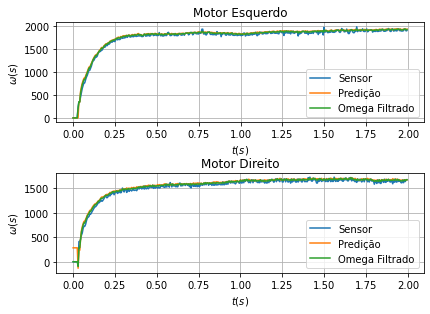

In [ ]:
#@title
# Plot com e sem filtro
# motor esquerdo
plt.subplot(211)
plt.plot(motorE.TIME, motorE.OMEGA_RAW, label = 'Sensor')
plt.plot(motorE.TIME, motorE.OMEGA_PREDICTED, label = 'Predição')
plt.plot(motorE.TIME, motorE.OMEGA_FILTERED, label = 'Omega Filtrado')

plt.legend()
plt.grid()
plt.ylabel(r'$\omega(s)$')
plt.xlabel(r'$t(s)$')
plt.title('Motor Esquerdo')
# motor direito
plt.subplot(212)
plt.plot(motorD.TIME, motorD.OMEGA_RAW, label = 'Sensor')
plt.plot(motorD.TIME, motorD.OMEGA_PREDICTED, label = 'Predição')
plt.plot(motorD.TIME, motorD.OMEGA_FILTERED, label = 'Omega Filtrado')

plt.legend()
plt.grid()
plt.ylabel(r'$\omega(s)$')
plt.xlabel(r'$t(s)$')
plt.title('Motor Direito')

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, 
                    right=0.95, hspace=0.5,wspace=0.35)
plt.show()

In [ ]:
# Predição x Medida

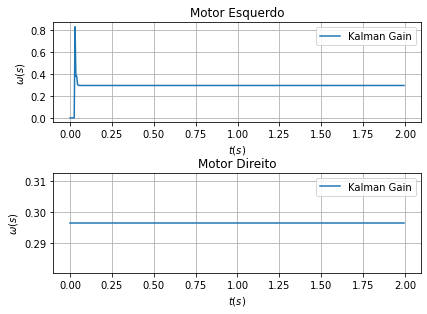

Ganho médio do motor Esquerdo =  0.2938751200000021
Ganho médio do motor Direito =  0.29653500000000216


In [ ]:
#@title

# Ganho x Tempo
plt.subplot(211)
plt.plot(motorE.TIME, motorE.K_GAIN, label = 'Kalman Gain')

plt.legend()
plt.grid()
plt.ylabel(r'$\omega(s)$')
plt.xlabel(r'$t(s)$')
plt.title('Motor Esquerdo')
# motor direito
plt.subplot(212)
plt.plot(motorD.TIME, motorD.K_GAIN, label = 'Kalman Gain')

plt.legend()
plt.grid()
plt.ylabel(r'$\omega(s)$')
plt.xlabel(r'$t(s)$')
plt.title('Motor Direito')

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, 
                    right=0.95, hspace=0.5,wspace=0.35)
plt.show()

print('Ganho médio do motor Esquerdo = ', motorE.K_GAIN.mean())
print('Ganho médio do motor Direito = ', motorD.K_GAIN.mean())

# Análise: Controlador

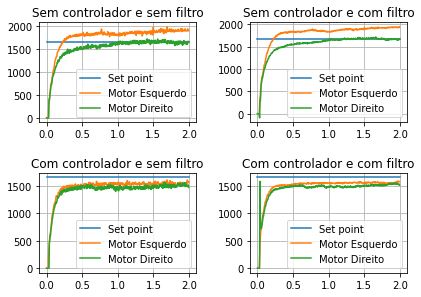

In [ ]:
#@title 
title = str()

# Sem controlador sem fltro
motorE = df[(df['MOTOR'] == 0) & (df['CONTROLLER'] == 0)]
motorD = df[(df['MOTOR'] == 1) & (df['CONTROLLER'] == 0)]
plt.subplot(221)
plt.plot(motorE.TIME, motorE.SET_POINT * motorE.OMEGA_MAX, label = 'Set point')
plt.plot(motorE.TIME, motorE['OMEGA_RAW'], label = 'Motor Esquerdo')
plt.plot(motorD.TIME, motorD['OMEGA_RAW'], label = 'Motor Direito')
plt.title('Sem controlador e sem filtro')
plt.grid()
plt.legend()
# Sem controlador com filtro
plt.subplot(222)
plt.plot(motorE.TIME, motorE.SET_POINT * motorE.OMEGA_MAX, label = 'Set point')
plt.plot(motorE.TIME, motorE['OMEGA_FILTERED'], label = 'Motor Esquerdo')
plt.plot(motorD.TIME, motorD['OMEGA_FILTERED'], label = 'Motor Direito')
plt.title('Sem controlador e com filtro')
plt.grid()
plt.legend()
# Com controlador sem filtro
motorE = df[(df['MOTOR'] == 0) & (df['CONTROLLER'] == 1)]
motorD = df[(df['MOTOR'] == 1) & (df['CONTROLLER'] == 1)]
plt.subplot(223)
plt.plot(motorE.TIME, motorE.SET_POINT * motorE.OMEGA_MAX, label = 'Set point')
plt.plot(motorE.TIME, motorE['OMEGA_RAW'], label = 'Motor Esquerdo')
plt.plot(motorD.TIME, motorD['OMEGA_RAW'], label = 'Motor Direito')
plt.title('Com controlador e sem filtro')
plt.grid()
plt.legend()
# Com controlador com filtro
plt.subplot(224)
plt.plot(motorE.TIME, motorE.SET_POINT * motorE.OMEGA_MAX, label = 'Set point')
plt.plot(motorE.TIME, motorE['OMEGA_FILTERED'], label = 'Motor Esquerdo')
plt.plot(motorD.TIME, motorD['OMEGA_FILTERED'], label = 'Motor Direito')
plt.title('Com controlador e com filtro')
plt.grid()
plt.legend()

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)
plt.show()